In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER='./data/'
PATHS_AND_GRAPH = DATA_FOLDER + 'wikispeedia_paths-and-graph/'
PATHS_FINISHED = PATHS_AND_GRAPH + 'paths_finished.tsv'
PATHS_UNFINISHED = PATHS_AND_GRAPH + 'paths_unfinished.tsv'

In [3]:
#data exploration
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], encoding='utf-8', skiprows=16).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit='s')
paths_finished.head()


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [4]:
import os
os.listdir('./data')

['plaintext_articles',
 'wikispeedia_articles_html.tar.gz',
 'wikispeedia_articles_plaintext.tar.gz',
 'wikispeedia_paths-and-graph',
 'wikispeedia_paths-and-graph.tar.gz',
 'wpcd']

In [5]:
paths_unfinished= pd.read_csv(PATHS_UNFINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], encoding='utf-8', skiprows=17).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit='s')
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


Loading shortest path distance matrix and articles

In [6]:
# shortest path distance matrix 
SHORTEST_PATH_MATRIX = PATHS_AND_GRAPH + 'shortest-path-distance-matrix.txt'
shortest_path_distance_matrix= pd.read_csv(SHORTEST_PATH_MATRIX, sep='\t', names=['shortest path'], header=None, encoding='utf-8', skiprows=17).copy(deep=True)
shortest_path_distance_matrix = shortest_path_distance_matrix['shortest path'].apply(lambda x: list(x))
shortest_path_distance_matrix

0       [0, _, _, _, _, _, 3, 3, 3, 3, 3, 3, 2, 5, 6, ...
1       [_, 0, _, _, _, _, 2, 2, 2, 2, 2, 3, 2, 5, 6, ...
2       [_, _, 0, _, _, _, 3, 3, 2, 2, 2, 4, 2, 5, 6, ...
3       [_, _, _, 0, _, _, 3, 3, 3, 3, 3, 3, 2, 5, 6, ...
4       [_, _, _, _, 0, _, 2, 2, 3, 2, 3, 3, 3, 5, 6, ...
                              ...                        
4599    [_, _, _, _, _, _, 2, 2, 2, 2, 2, 3, 2, 5, 6, ...
4600    [_, _, _, _, _, _, 3, 3, 3, 3, 3, 4, 3, 4, 5, ...
4601    [_, _, _, _, _, _, 2, 2, 2, 2, 2, 4, 2, 4, 5, ...
4602    [_, _, _, _, _, _, 3, 3, 3, 3, 3, 4, 3, 6, 7, ...
4603    [_, _, _, _, _, _, 2, 2, 2, 3, 3, 3, 2, 5, 6, ...
Name: shortest path, Length: 4604, dtype: object

In [7]:
# articles
ARTICLES = PATHS_AND_GRAPH + 'articles.tsv'
articles= pd.read_csv(ARTICLES, sep='\t', header=None, encoding='utf-8', names=['article name'], skiprows=12).copy(deep=True)
articles

,article name
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts
...,...
4599,Zionism
4600,Zirconium
4601,Zoroaster
4602,Zuid-Gelders


## Longer paths more challenging -> lead to giving up?
(Look at ratings and giving up rate)

In [8]:
# algo pour elever < et split paths
from tqdm import tqdm
pd.options.mode.chained_assignment = None  # Check whether this is ok !!

paths_finished_copy = paths_finished.copy()
for i in tqdm(range(len(paths_finished_copy))):
    paths_finished_copy['path'].iloc[i] = paths_finished_copy['path'].iloc[i].split(';')
    for item in paths_finished_copy['path'].iloc[i].copy():
        if (item == '<'):
            paths_finished_copy['path'].iloc[i].remove(item)

paths_finished_copy.path.iloc[10]

100%|███████████████████████████████████████████████████████████████████████████| 51318/51318 [01:32<00:00, 555.78it/s]


['14th_century',
 'Time',
 'Science',
 'Nature',
 'Weather',
 'Sunlight',
 'Sun',
 'Earth%27s_atmosphere',
 'Ultraviolet',
 'Color',
 'Light',
 'Rainbow']

In [9]:
articles['article name'].iloc[10]

'14th_century'

In [16]:
# comparing optimal path length between finished and unfinished

# on sen fou de ca 
mean_finished_path_length = paths_finished['path'].apply(lambda x: len(x.split(';'))).mean()

# change to only take unique path datapoints !!!
mean_finished_optimal_path_length = np.zeros((len(paths_finished_copy),1))
for i in tqdm(range(len(mean_finished_optimal_path_length))):
    start_article = paths_finished_copy['path'][i][0]
    end_article = paths_finished_copy['path'][i][-1]
    start_index = articles[articles['article name'] == start_article].index[0]
    end_index = articles[articles['article name'] == end_article].index[0]
    if shortest_path_distance_matrix[start_index][end_index] == '_' :   # le jeu peut demander un path impossible!!!
        mean_finished_optimal_path_length[i] = -1
    else:
        mean_finished_optimal_path_length[i] = shortest_path_distance_matrix[start_index][end_index]

mean_finished_optimal_path_length =  mean_finished_optimal_path_length.mean()
print(mean_finished_path_length, mean_finished_optimal_path_length)

100%|███████████████████████████████████████████████████████████████████████████| 51318/51318 [02:24<00:00, 354.55it/s]

6.757434038738844 2.8454148641802095


rating
2.0    8792
1.0    8542
3.0    7261
4.0    2748
5.0    1158
Name: count, dtype: int64


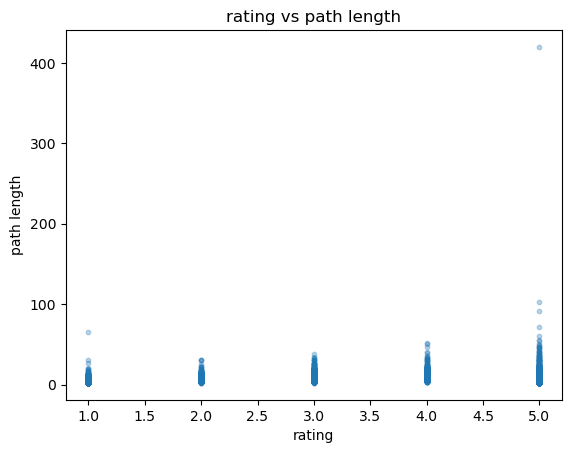

In [17]:
# correlation between rating and path length (look in finished paths)

# remove nans
paths_finished_copy_woNan = paths_finished_copy.dropna(subset=["rating"])
finished_path_length_woNan = paths_finished_copy_woNan['path'].apply(lambda x: len(x))

print(paths_finished_copy_woNan['rating'].value_counts())

plt.scatter(paths_finished_copy_woNan['rating'], finished_path_length_woNan, alpha = 0.3, s = 10)
plt.ylabel('path length')
plt.xlabel('rating')
plt.title('rating vs path length')
plt.show()

In [ ]:
display(paths_unfinished_copy.iloc[-1])

In [85]:
# correlation between path length and giving up/ restarting (lonk in unfinished paths)

paths_unfinished_copy = paths_unfinished.copy()
#paths_unfinished_copy['path'] = paths_unfinished_copy['path'].split(';')

paths_unfinished_copy = paths_unfinished_copy[paths_unfinished_copy['target'].isin(articles['article name'])]
mean_unfinished_optimal_path_length = np.zeros((len(paths_unfinished_copy),1))


#mean_unfinished_path_length = paths_unfinished['path'].apply(lambda x: len(x.split(';'))).mean()

for i in tqdm(range(len(mean_unfinished_optimal_path_length))):
    #if len(paths_unfinished_copy['path'].iloc[i].split(';')) == 1:
       # start_article = paths_unfinished_copy['path'].iloc[i]
    start_article = paths_unfinished_copy['path'].iloc[i].split(';')[0]
    end_article = paths_unfinished_copy['target'].iloc[i]
    start_index = articles[articles['article name'] == start_article].index[0]
    end_index = articles[articles['article name'] == end_article].index[0]
    if shortest_path_distance_matrix[start_index][end_index] == '_' :
        mean_unfinished_optimal_path_length[i] = -1
    else:
        mean_unfinished_optimal_path_length[i] = shortest_path_distance_matrix[start_index][end_index]

mean_unfinished_optimal_path_length =  mean_unfinished_optimal_path_length.mean()
print(mean_unfinished_optimal_path_length)


# 'long peper' error, maybe delete datapoints if target isn't part of article list out these !!!

100%|██████████████████████████████████████████████████████████████████████████| 24846/24846 [00:24<00:00, 1015.74it/s]

3.2303791354745233
